In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Covid-19 Twitter Sentiment Analysis

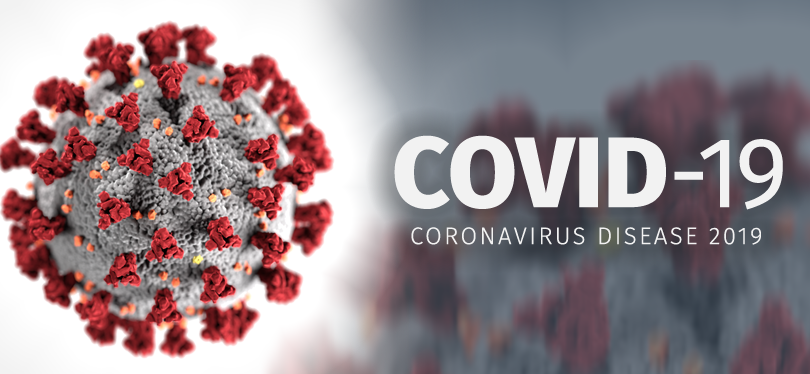

In [2]:
from IPython.display import Image
Image(filename='covid.png')

In [3]:
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import re

In [1]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [4]:
covid19 = pd.read_csv('COVID19_tweets.csv')

In [5]:
covid19.drop(['COMMENTS','LIKES'], axis=1, inplace=True)

In [6]:
covid19.columns = ['Tweets','Retweets']

In [7]:
covid19.fillna(0, inplace=True)

In [8]:
covid19.head()

,Tweets,Retweets
0,Government cant use #COVID__19 as excuse to sh...,1.1K
1,Things are getting back on tracks. Hope for th...,0
2,This happened between Mbappe and CR7 and CR7 t...,41
3,Why do the government need a 2 week lockdown t...,0
4,World is waiting for this day . #COVID__19,0


In [9]:
covid19.shape

(55, 2)

In [10]:
covid19.isnull().sum()

Tweets      0
Retweets    0
dtype: int64

In [11]:
stayhometweets = pd.read_csv('stayhometweets.csv')
covid19tweets = pd.read_csv('covid19tweets.csv')
coronatweets = pd.read_csv('coronatweets.csv')
covidtweets = pd.read_csv('covidtweets.csv')
pandemic_tweets = pd.read_csv('pandemic_tweets.csv')

In [12]:
stayhometweets.drop(['COMMENTS','LIKES'], axis=1, inplace=True)
covid19tweets.drop(['COMMENTS','LIKES'], axis=1, inplace=True)
coronatweets.drop(['COMMENTS','LIKES'], axis=1, inplace=True)
covidtweets.drop(['COMMENTS','LIKES'], axis=1, inplace=True)
pandemic_tweets.drop(['COMMENTS','LIKES'], axis=1, inplace=True)

In [13]:
stayhometweets.columns = ['Tweets','Retweets']
covid19tweets.columns = ['Tweets','Retweets']
coronatweets.columns = ['Tweets','Retweets']
covidtweets.columns = ['Tweets','Retweets']
pandemic_tweets.columns = ['Tweets','Retweets']

In [14]:
stayhometweets.fillna(0, inplace=True)
covid19tweets.fillna(0, inplace=True)
coronatweets.fillna(0, inplace=True)
covidtweets.fillna(0, inplace=True)
pandemic_tweets.fillna(0, inplace=True)

In [15]:
covid19_twitter = pd.concat([covid19, stayhometweets, covid19tweets, coronatweets, covidtweets,  pandemic_tweets])

# Tweets Dataset

In [16]:
covid19_twitter.head()

,Tweets,Retweets
0,Government cant use #COVID__19 as excuse to sh...,1.1K
1,Things are getting back on tracks. Hope for th...,0
2,This happened between Mbappe and CR7 and CR7 t...,41
3,Why do the government need a 2 week lockdown t...,0
4,World is waiting for this day . #COVID__19,0


In [17]:
covid19_twitter.shape

(738, 2)

In [18]:
covid19_twitter["word_count"] = covid19_twitter["Tweets"].apply(lambda tweet: len(tweet.split()))

In [19]:
covid19_twitter.head()

,Tweets,Retweets,word_count
0,Government cant use #COVID__19 as excuse to sh...,1.1K,39
1,Things are getting back on tracks. Hope for th...,0,21
2,This happened between Mbappe and CR7 and CR7 t...,41,24
3,Why do the government need a 2 week lockdown t...,0,37
4,World is waiting for this day . #COVID__19,0,8


In [20]:
dfs = covid19_twitter

# Tweets Word Count Distribution

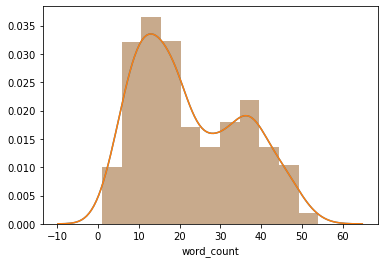

In [21]:
# Word Count Distribution Histogram
sns_plot = sns.distplot(dfs['word_count'])
fig = sns_plot.get_figure()
fig.savefig("covid_word_count.png")
sns.distplot(dfs['word_count'])

In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [23]:
senti_analyzer = SentimentIntensityAnalyzer()

In [24]:
compound_score = []

for sen in dfs['Tweets']:
    
    compound_score.append(senti_analyzer.polarity_scores(sen)['compound'])

In [25]:
dfs['Compound Score'] = compound_score

In [26]:
Sentiment = []

for i in compound_score:
    
    if i >= 0.05:
        
        Sentiment.append('Positive')
        
    elif i > -0.05 and i < 0.05:
        
        Sentiment.append('Neutral')
        
    else:
        
        Sentiment.append('Negative')
        

In [27]:
dfs['Sentiment'] = Sentiment

In [28]:
dfs.head()

,Tweets,Retweets,word_count,Compound Score,Sentiment
0,Government cant use #COVID__19 as excuse to sh...,1.1K,39,0.4939,Positive
1,Things are getting back on tracks. Hope for th...,0,21,0.7964,Positive
2,This happened between Mbappe and CR7 and CR7 t...,41,24,0.5574,Positive
3,Why do the government need a 2 week lockdown t...,0,37,-0.5859,Negative
4,World is waiting for this day . #COVID__19,0,8,0.0000,Neutral


In [29]:
pos_count = sum(dfs['Sentiment']=='Positive')
neg_count = sum(dfs['Sentiment']=='Negative')
neu_count = sum(dfs['Sentiment']=='Neutral')

# Sentiment Distribution of the Tweets

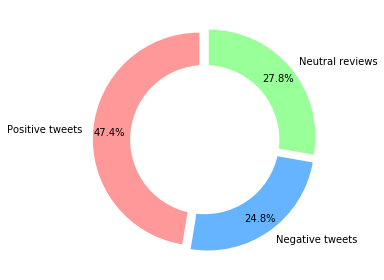

In [30]:
# Sentiment Distribution

pos_count = sum(dfs['Sentiment']=='Positive')
neg_count = sum(dfs['Sentiment']=='Negative')
neu_count = sum(dfs['Sentiment']=='Neutral')

import matplotlib.pyplot as plt
# Pie chart
labels = ['Positive tweets', 'Negative tweets', 'Neutral reviews']
sizes = [pos_count, neg_count, neu_count]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.05,0.05,0.05)
 
    
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.savefig('covid_sentiment_distribution.png')

plt.show()

# Most Positive Tweet

In [31]:
# Most Positive Tweet

pos_max = dfs.loc[dfs['Compound Score']==max(dfs['Compound Score'])]

In [32]:
pos_max.reset_index(drop=True, inplace=True)

In [33]:
pos_max[:1]

,Tweets,Retweets,word_count,Compound Score,Sentiment
0,Let us pray that the divine blessing of Goddes...,0,38,0.9842,Positive


# Most Negative Tweet

In [34]:
# Most Negative Tweet

neg_max = dfs.loc[dfs['Compound Score']==min(dfs['Compound Score'])]
neg_max

,Tweets,Retweets,word_count,Compound Score,Sentiment
40,"So: #Trump’s #COVID failures, why families sho...",6,35,-0.9712,Negative


# Positive Tweets

In [35]:
# Positive Tweets

gp = dfs.groupby(by=['Sentiment'])
positive_tweets = gp.get_group('Positive')
positive_tweets.head()

,Tweets,Retweets,word_count,Compound Score,Sentiment
0,Government cant use #COVID__19 as excuse to sh...,1.1K,39,0.4939,Positive
1,Things are getting back on tracks. Hope for th...,0,21,0.7964,Positive
2,This happened between Mbappe and CR7 and CR7 t...,41,24,0.5574,Positive
5,We can fight this !!! Come on Malaysians S...,3,17,0.5962,Positive
11,These cats are Evil #funny #dogs #cute #Meme...,12,15,0.1280,Positive


In [36]:
positive_tweets.shape

(350, 5)

# Negative Tweets

In [37]:
# Negative Tweets

negative_tweets = gp.get_group('Negative')
negative_tweets.head()

,Tweets,Retweets,word_count,Compound Score,Sentiment
3,Why do the government need a 2 week lockdown t...,0,37,-0.5859,Negative
9,#EU #COVID__19 trajectory is BAD. Very very bad.,1,8,-0.8521,Negative
10,#COVID__19 is not anything to laugh about but...,6,18,-0.6202,Negative
14,This is so sad.. so so sad #COVID__19,1,8,-0.8254,Negative
15,Just to let the government know officially... ...,0,35,-0.6369,Negative


In [38]:
negative_tweets.shape

(183, 5)

# Neutral Tweets

In [39]:
# Neutral Tweets

neutral_tweets = gp.get_group('Neutral')
neutral_tweets.head()

,Tweets,Retweets,word_count,Compound Score,Sentiment
4,World is waiting for this day . #COVID__19,0,8,0.0,Neutral
6,Dating in the era of COVID. #dating #COVID__19,0,8,0.0,Neutral
7,"Everythang’s Corrupt ""Every side is the #dark...",0,22,0.0,Neutral
8,Covid-19 Test Promotion #Covid19test #COVID_...,1,6,0.0,Neutral
16,If I can wear a mask with *four* lung conditio...,10,22,0.0,Neutral


In [40]:
neutral_tweets.shape

(205, 5)

# Wordcloud Function

In [41]:
# Wordcloud Function

def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='w')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [42]:
def wordcloud(data):
    
    words_corpus = ''
    words_list = []

    
    for rev in data["Tweets"]:
        
        text = str(rev).lower()
        text = text.replace('rt', ' ') 
        
        
        text = re.sub(r"http\S+", "", text)        
        text = re.sub(r'[^\w\s]','',text)
        text = ''.join([i for i in text if not i.isdigit()])
        
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        
        for word in tokens[:]: 
            if word.startswith('@'): 
                tokens.remove(word) 
        # Remove aplha numeric characters
        
        for words in tokens:
            
            words_corpus = words_corpus + words + " "
            words_list.append(words)
            
    return words_corpus, words_list

In [43]:
import cv2
image1 = cv2.imread('mask1.png')
mask = np.array(image1)

# WordCloud - Positive Tweets

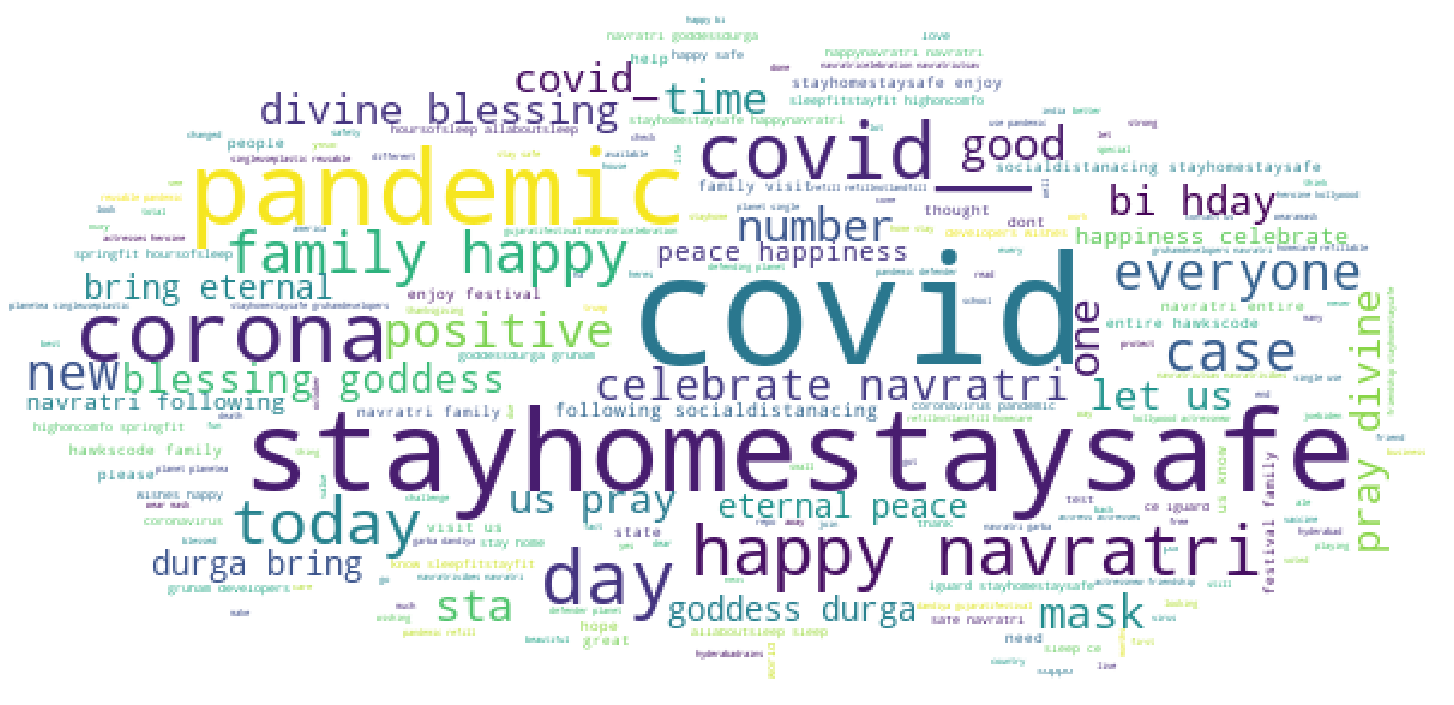

In [44]:
# WordCloud - Positive Tweets

from wordcloud import WordCloud
positive_wordcloud = WordCloud(background_color= "white",mask=mask,width=900, height=500).generate(wordcloud(positive_tweets)[0])
    
plot_Cloud(positive_wordcloud)
positive_wordcloud.to_file('Covid_positive_tweets_wc.png')


# WordCloud - Negative Tweets

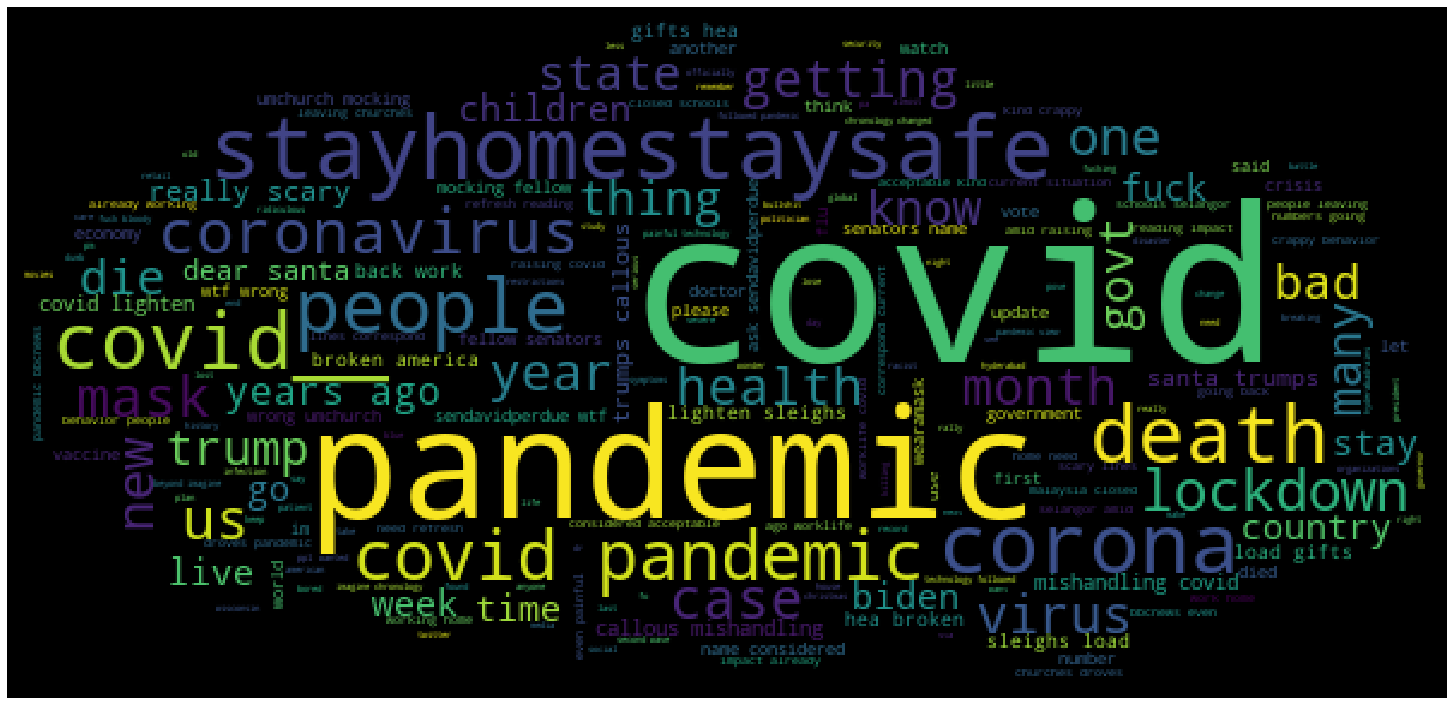

In [45]:
# WordCloud - Negative Tweets

negative_wordcloud = WordCloud(mask=mask,width=900, height=500).generate(wordcloud(negative_tweets)[0])

plot_Cloud(negative_wordcloud)
negative_wordcloud.to_file('covid_negative_tweets_wc.png')


# WordCloud - Neutral Tweets

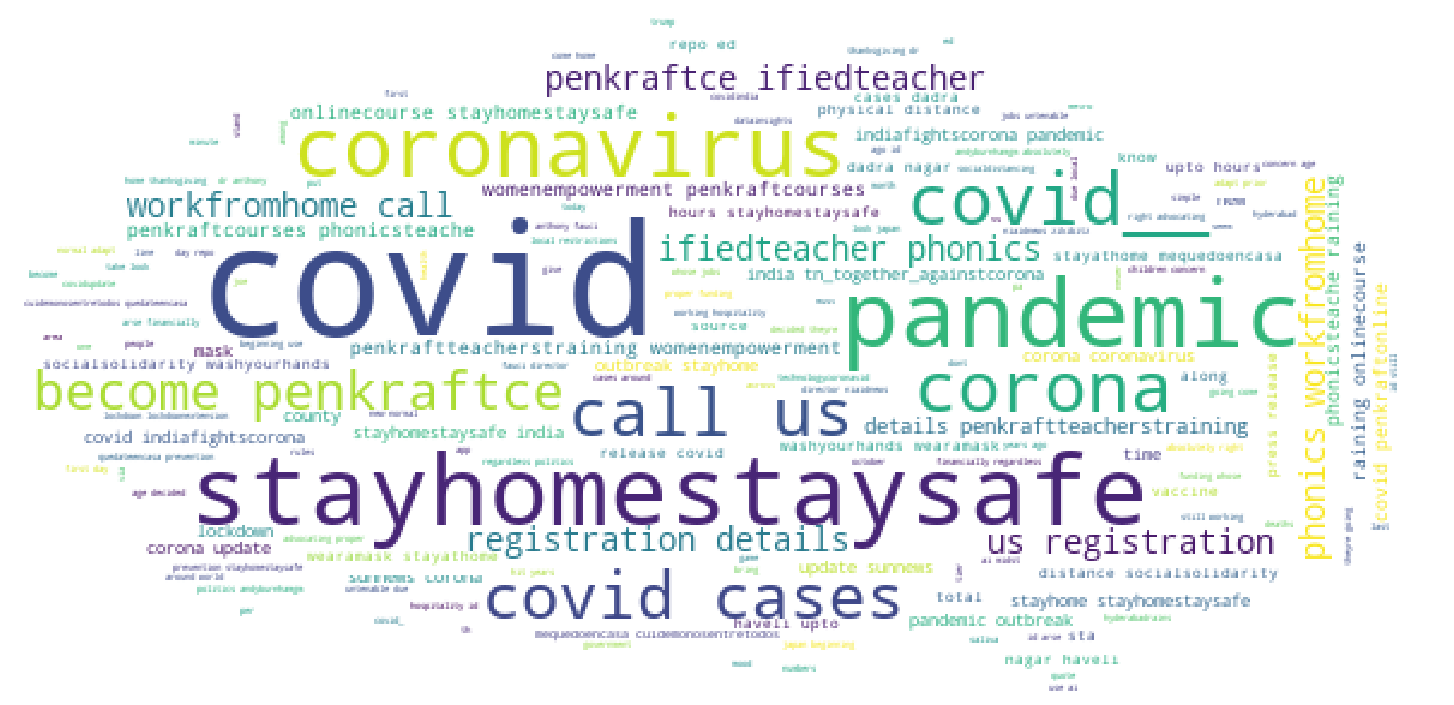

In [46]:
# WordCloud - Neutral Tweets

neutral_wordcloud = WordCloud(background_color= "white",mask=mask,width=900, height=500).generate(wordcloud(neutral_tweets)[0])

plot_Cloud(neutral_wordcloud)
neutral_wordcloud.to_file('covid_neutral_tweets_wc.png')


# Wordcloud - All Tweets


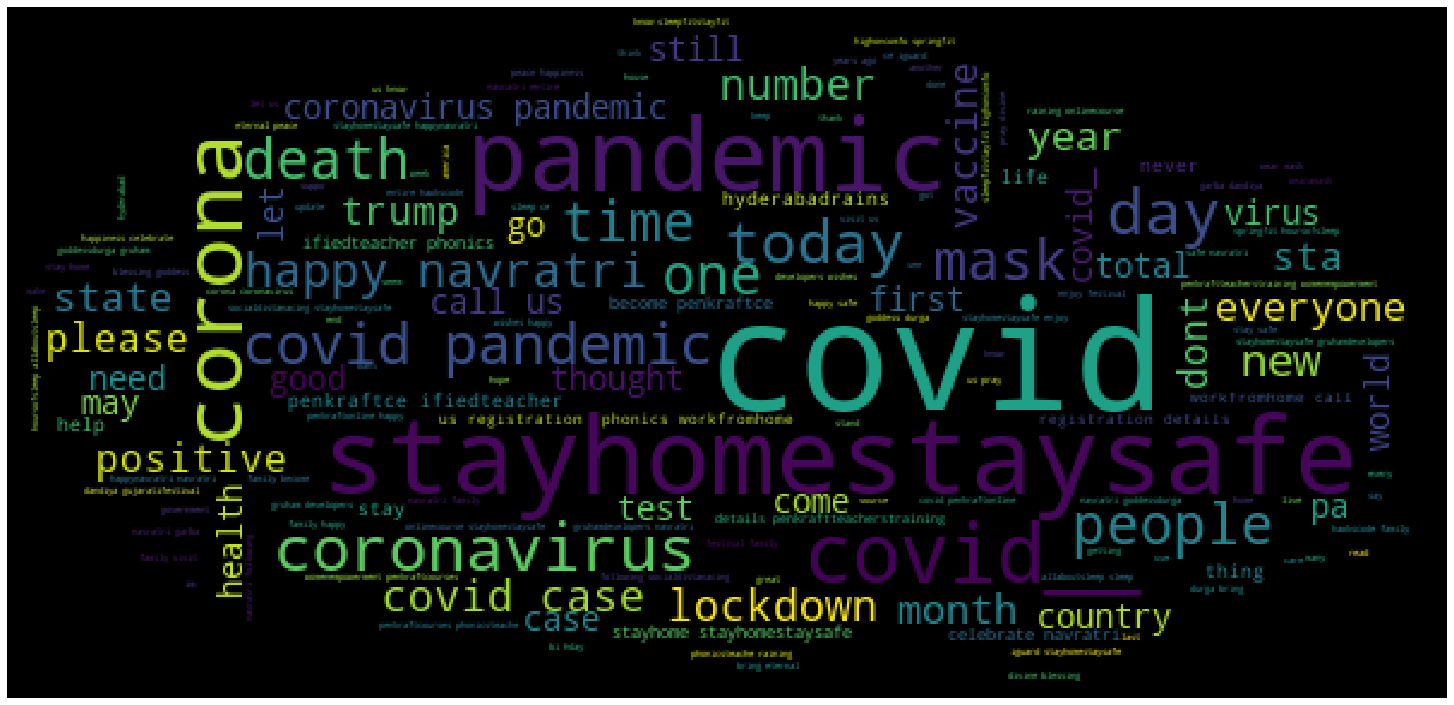

In [47]:
# Wordcloud - All Tweets

total_wordcloud = WordCloud(mask=mask, width=900, height=500).generate(wordcloud(dfs)[0])

plot_Cloud(total_wordcloud)
total_wordcloud.to_file('covid_total_tweets_wc.png')


# Most Frequent Words - Total Tweets

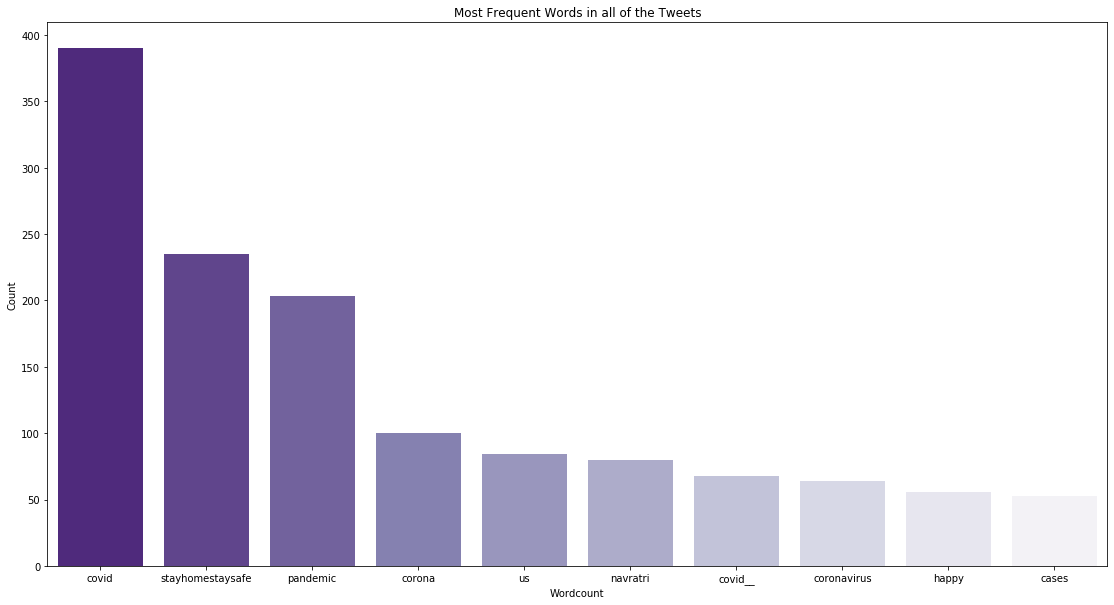

In [48]:
# Most Frequent Words - Total Tweets

aa = nltk.FreqDist(wordcloud(dfs)[1])
dd = pd.DataFrame({'Wordcount': list(aa.keys()),
                  'Count': list(aa.values())})
# selecting top 10 most frequent hashtags     
dd = dd.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,10))
plt.title('Most Frequent Words in all of the Tweets')
ax = sns.barplot(data=dd, palette="Purples_r",x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
fig = ax.get_figure()
fig.savefig("covid_total_tweets_wf.png")
plt.show()

# Most Frequent Words - Positive Tweets

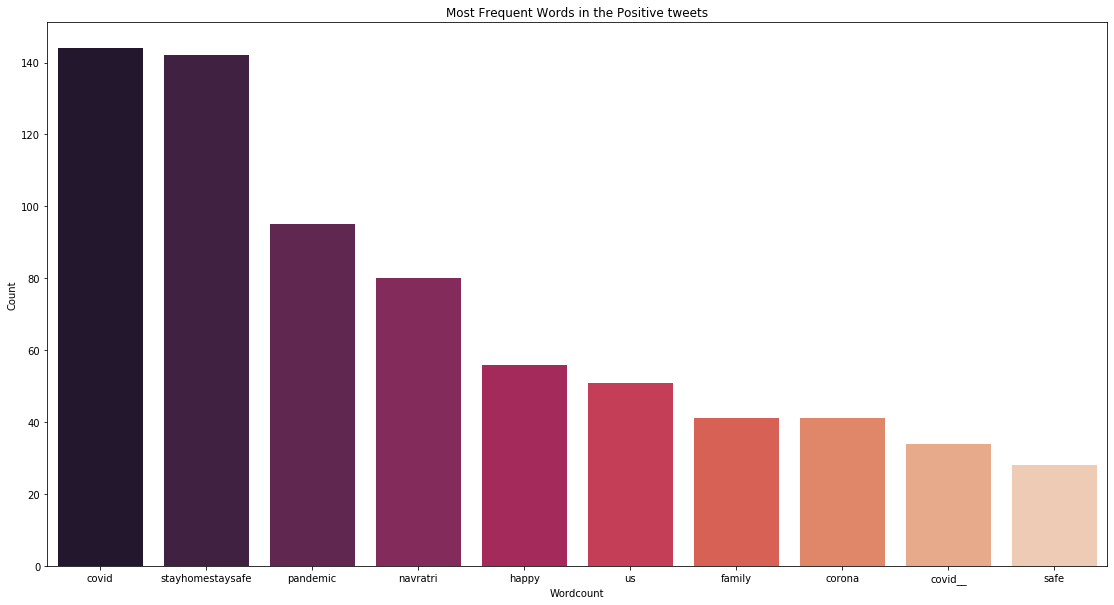

In [49]:
# Most Frequent Words - Positive Tweets

ap = nltk.FreqDist(wordcloud(positive_tweets)[1])
dp = pd.DataFrame({'Wordcount': list(ap.keys()),
                  'Count': list(ap.values())})
# selecting top 10 most frequent hashtags     
dp = dp.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,10))
plt.title('Most Frequent Words in the Positive tweets')
ax = sns.barplot(data=dp, palette="rocket",x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
fig = ax.get_figure()
fig.savefig("covid_positive_tweets_wf.png")
plt.show()

# Most Frequent Words - Negative Tweets

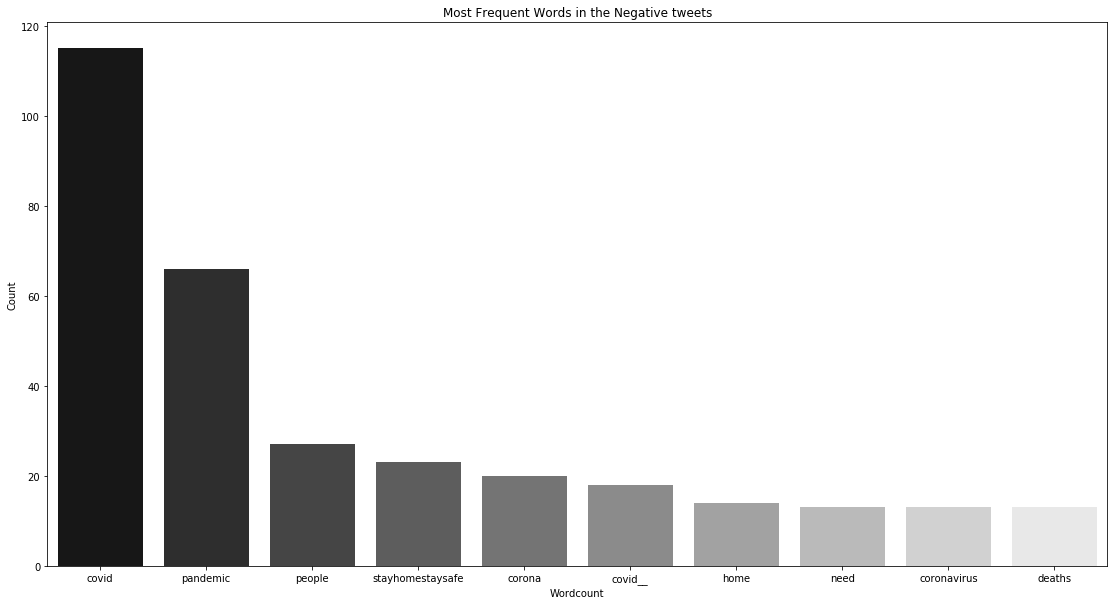

In [50]:
# Most Frequent Words - Negative Tweets

an = nltk.FreqDist(wordcloud(negative_tweets)[1])
dn = pd.DataFrame({'Wordcount': list(an.keys()),
                  'Count': list(an.values())})
# selecting top 10 most frequent hashtags     
dn = dn.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,10))
plt.title('Most Frequent Words in the Negative tweets')
ax = sns.barplot(data=dn,palette="gray", x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
fig = ax.get_figure()
fig.savefig("covid_negative_tweets_wf.png")
plt.show()

# Most Frequent Words - Neutral Tweets

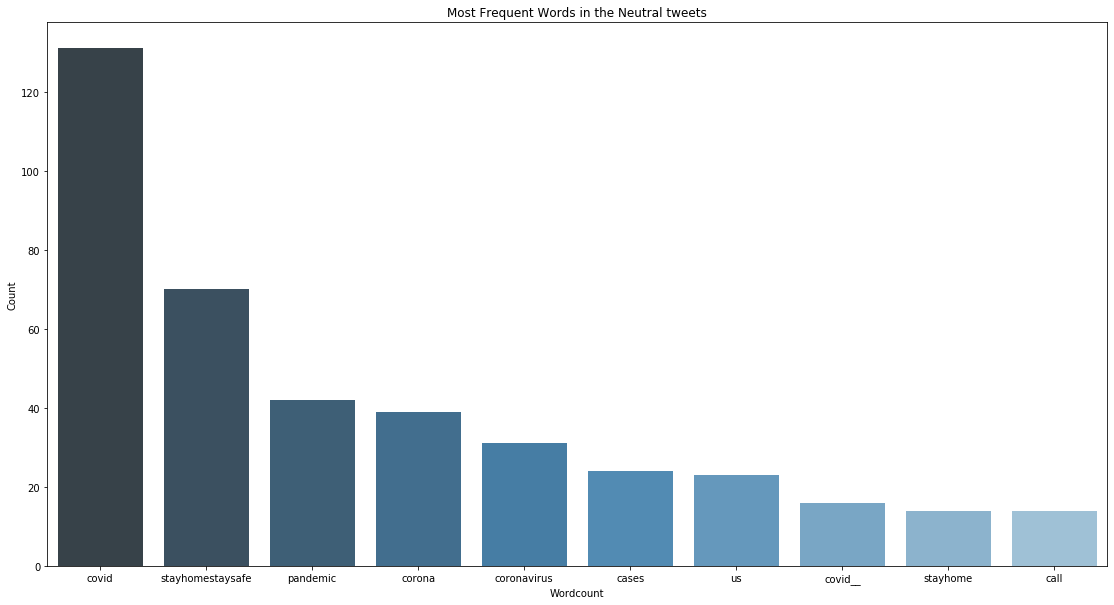

In [51]:
# Most Frequent Words - Neutral Tweets

au = nltk.FreqDist(wordcloud(neutral_tweets)[1])
du = pd.DataFrame({'Wordcount': list(au.keys()),
                  'Count': list(au.values())})
# selecting top 10 most frequent hashtags     
du = du.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,10))
plt.title('Most Frequent Words in the Neutral tweets')
ax = sns.barplot(data=du,palette= "Blues_d",x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
fig = ax.get_figure()
fig.savefig("covid_neutral_tweets_wf.png")
plt.show()